# Regla de Decisión MAP en un Canal BSC

## Planteamiento del problema

Tenemos un símbolo binario $A \in \{0,1\}$ con probabilidades a priori $P_A(0)=q$ y $P_A(1)=1-q$ que se transmite a través de un canal BSC (Binary Symmetric Channel). La observación $Y \in \{0,1\}$ es igual a $A$ con probabilidad $1-p$, es decir, el canal introduce un error con probabilidad $p$.

## Regla de decisión MAP

La regla de decisión MAP (Maximum A Posteriori) elige el valor $A$ que maximiza la probabilidad a posteriori $P(A|Y)$:

$$\hat{A} = \arg\max_{A} P(A|Y)$$

Utilizando el teorema de Bayes:

$$P(A|Y) = \frac{P(Y|A)P(A)}{P(Y)}$$

Como $P(Y)$ es constante para un $Y$ dado, podemos simplificar:

$$\hat{A} = \arg\max_{A} P(Y|A)P(A)$$

## Modelo del canal BSC

Para un canal BSC con probabilidad de error $p$:
- $P(Y=0|A=0) = 1-p$
- $P(Y=1|A=0) = p$
- $P(Y=0|A=1) = p$
- $P(Y=1|A=1) = 1-p$

## Análisis para las distintas observaciones

### Si observamos $Y=0$:

$P(A=0|Y=0) \propto P(Y=0|A=0)P(A=0) = (1-p)q$

$P(A=1|Y=0) \propto P(Y=0|A=1)P(A=1) = p(1-q)$

Decidimos $A=0$ si $(1-p)q > p(1-q)$, o equivalentemente, si $\frac{q}{1-q} > \frac{p}{1-p}$

### Si observamos $Y=1$:

$P(A=0|Y=1) \propto P(Y=1|A=0)P(A=0) = pq$

$P(A=1|Y=1) \propto P(Y=1|A=1)P(A=1) = (1-p)(1-q)$

Decidimos $A=0$ si $pq > (1-p)(1-q)$, o equivalentemente, si $\frac{q}{1-q} > \frac{1-p}{p}$

## Caso 1: $q=0.9$ y $p=0.2$

### Si $Y=0$:
$P(A=0|Y=0) \propto (1-p)q = 0.8 \times 0.9 = 0.72$
$P(A=1|Y=0) \propto p(1-q) = 0.2 \times 0.1 = 0.02$

Como $0.72 > 0.02$, decidimos $A=0$.

### Si $Y=1$:
$P(A=0|Y=1) \propto pq = 0.2 \times 0.9 = 0.18$
$P(A=1|Y=1) \propto (1-p)(1-q) = 0.8 \times 0.1 = 0.08$

Como $0.18 > 0.08$, decidimos $A=0$.

Por lo tanto, para $q=0.9$ y $p=0.2$, la regla MAP siempre decide $A=0$ independientemente del valor observado $Y$. Esto es debido al fuerte sesgo en la probabilidad a priori hacia $A=0$.

## Caso 2: $q=0.5$ y $p=0.3$

### Si $Y=0$:
$P(A=0|Y=0) \propto (1-p)q = 0.7 \times 0.5 = 0.35$
$P(A=1|Y=0) \propto p(1-q) = 0.3 \times 0.5 = 0.15$

Como $0.35 > 0.15$, decidimos $A=0$.

### Si $Y=1$:
$P(A=0|Y=1) \propto pq = 0.3 \times 0.5 = 0.15$
$P(A=1|Y=1) \propto (1-p)(1-q) = 0.7 \times 0.5 = 0.35$

Como $0.15 < 0.35$, decidimos $A=1$.

Por lo tanto, para $q=0.5$ y $p=0.3$, la regla MAP decide $A=Y$, es decir, confiamos en la observación. Esto es lo esperado cuando las probabilidades a priori son iguales.

## Sobre la normalización de las probabilidades a posteriori

Cuando calculamos $P(A|Y) \propto P(Y|A)P(A)$, estamos trabajando con proporcionalidades, no con probabilidades normalizadas. Si sumamos todas las barras del histograma, no obtenemos 1 porque falta el factor de normalización $P(Y)$.

La normalización correcta sería:

$$P(A|Y) = \frac{P(Y|A)P(A)}{P(Y)} = \frac{P(Y|A)P(A)}{P(Y|A=0)P(A=0) + P(Y|A=1)P(A=1)}$$

Si aplicamos esta normalización, entonces $P(A=0|Y) + P(A=1|Y) = 1$ para cada valor de $Y$.

## Comparación de las reglas de decisión

La regla MAP produce la mínima probabilidad de error cuando la decisión se basa tanto en la información del canal (parámetro $p$) como en la información a priori (parámetro $q$).

- En el **Caso 1** ($q=0.9$, $p=0.2$), la regla MAP siempre decide $A=0$ debido al fuerte sesgo a priori.
- En el **Caso 2** ($q=0.5$, $p=0.3$), la regla MAP decide $A=Y$, aprovechando la información del canal.

La regla MAP es óptima en términos de minimizar la probabilidad de error en ambos casos, pero el Caso 2 ilustra mejor el comportamiento típico de una regla MAP donde se aprovecha tanto la información a priori como la del canal para tomar decisiones.

In [ ]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 991.0 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.6/11.5 MB 17.5 MB/s eta 0:00:01
   ---- ----------------------------------- 1.2/11.5 MB 15.0 MB/s eta 0:00:01
   ---- ----------------------------------- 1.2/11.5 MB 9.8 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.5 MB 13.5 MB/s eta 0:00:01
   ---------- ----------------------------- 2.9/11.5 MB 14.1 MB/s eta 0:00:01
   ----------- ---------------------------- 3.5/11.5 MB 13.8 MB/s eta 0:00:01
   ------------ --------------------------- 3.6/11.5 MB 14.2 MB/s eta 0:00:01
   --------------- ------------------------ 4.5/11.5 MB 13.7 MB/s eta 0:00


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Caso 1: q=0.9, p=0.2
Matriz de confusión:
[[89999.     0.]
 [10001.     0.]]
Tasa de error: 0.1000

Caso 2: q=0.5, p=0.3
Matriz de confusión:
[[35410. 14785.]
 [15006. 34799.]]
Tasa de error: 0.2979


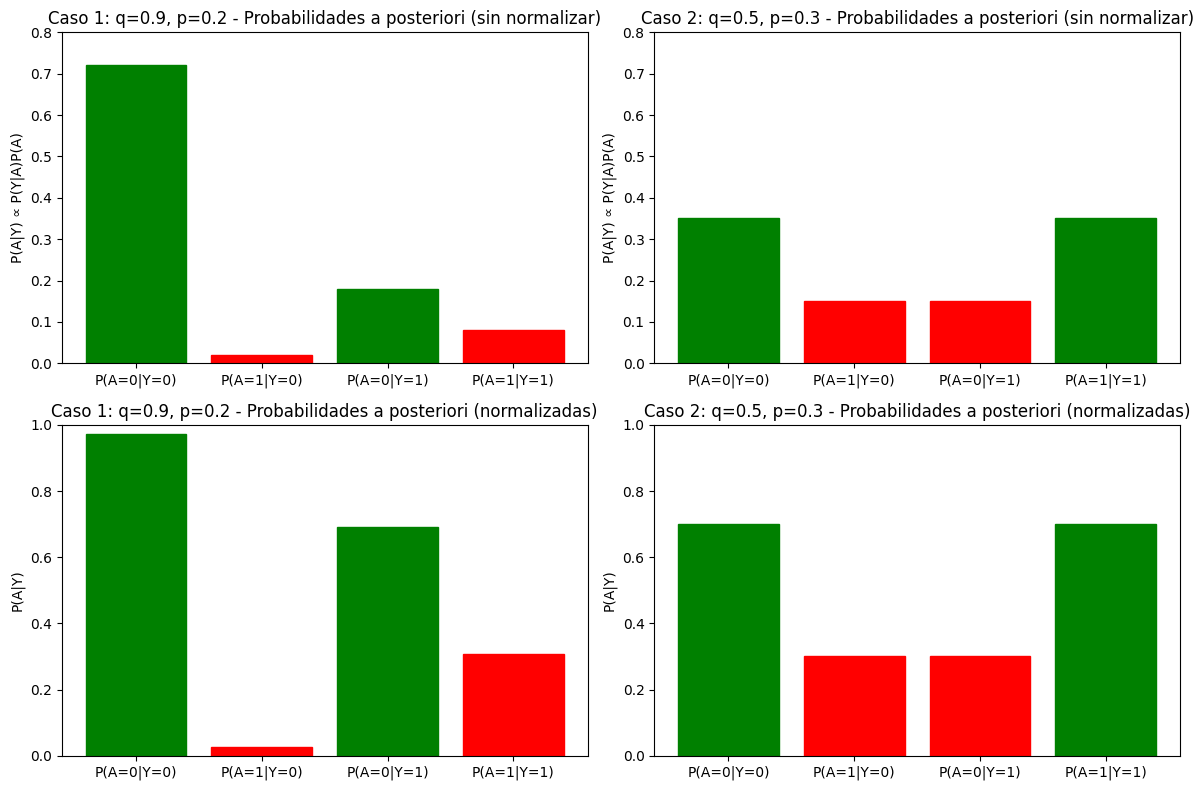

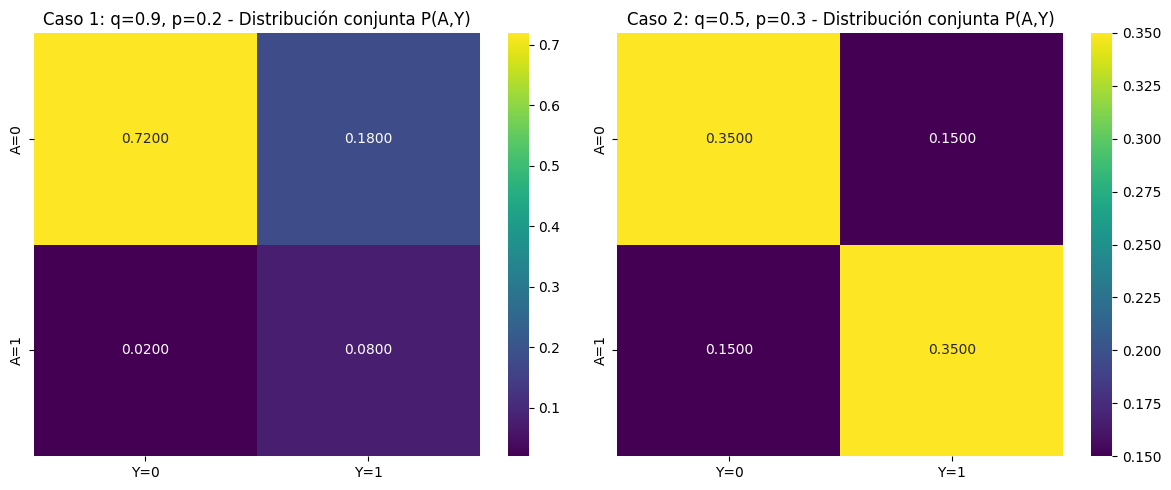

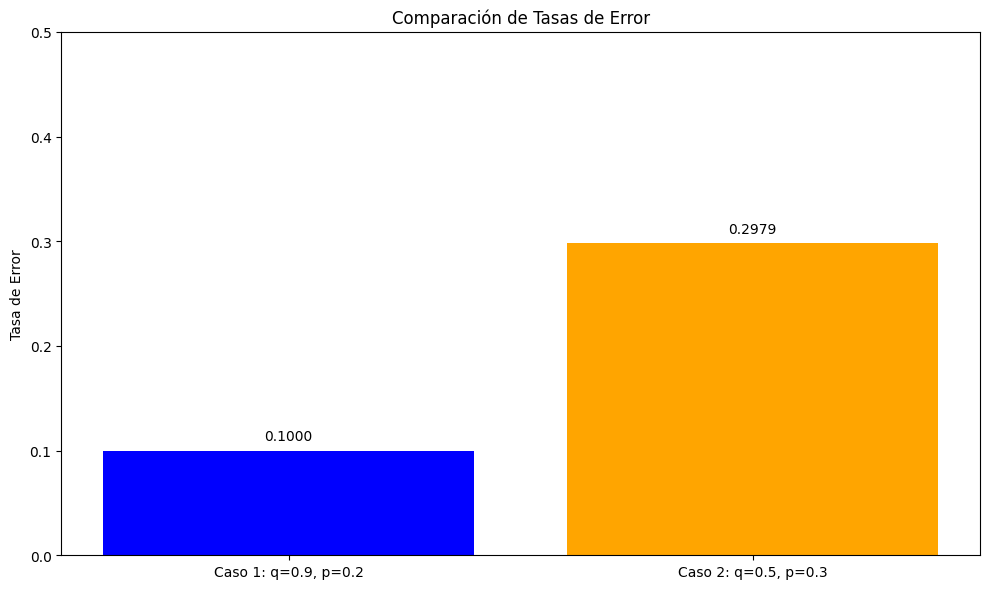


Análisis de reglas de decisión MAP:

Caso 1: q=0.9, p=0.2
P(A=0|Y=0) ∝ 0.7200, P(A=1|Y=0) ∝ 0.0200
P(A=0|Y=1) ∝ 0.1800, P(A=1|Y=1) ∝ 0.0800
Regla MAP: Si Y=0, decidir A=0; Si Y=1, decidir A=0
Tasa de error usando regla MAP: 0.1000

Caso 2: q=0.5, p=0.3
P(A=0|Y=0) ∝ 0.3500, P(A=1|Y=0) ∝ 0.1500
P(A=0|Y=1) ∝ 0.1500, P(A=1|Y=1) ∝ 0.3500
Regla MAP: Si Y=0, decidir A=0; Si Y=1, decidir A=1
Tasa de error usando regla MAP: 0.2979


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import seaborn as sns

# Función para generar datos para un canal BSC con probabilidades a priori
def generate_bsc_data(q, p, n_samples):
    # Generar símbolos A con probabilidad a priori q
    A = np.random.binomial(1, 1-q, n_samples)
    
    # Generar ruido del canal con probabilidad p
    noise = np.random.binomial(1, p, n_samples)
    
    # Aplicar el canal BSC: Y = A ⊕ noise (XOR)
    Y = np.logical_xor(A, noise).astype(int)
    
    return A, Y

# Función para aplicar la regla de decisión MAP
def map_decision(Y, q, p):
    decisions = np.zeros_like(Y)
    for i, y in enumerate(Y):
        # Calcular probabilidades a posteriori P(A|Y)
        if y == 0:
            p_a0 = (1-p) * q  # P(Y=0|A=0) * P(A=0)
            p_a1 = p * (1-q)  # P(Y=0|A=1) * P(A=1)
        else:  # y == 1
            p_a0 = p * q      # P(Y=1|A=0) * P(A=0)
            p_a1 = (1-p) * (1-q)  # P(Y=1|A=1) * P(A=1)
        
        # Aplicar regla MAP
        decisions[i] = 0 if p_a0 > p_a1 else 1
    
    return decisions

# Calcular la matriz de confusión y la tasa de error
def calculate_performance(A, A_hat):
    # Matriz de confusión
    conf_matrix = np.zeros((2, 2))
    for a, a_hat in zip(A, A_hat):
        conf_matrix[a, a_hat] += 1
    
    # Tasa de error
    error_rate = np.sum(A != A_hat) / len(A)
    
    return conf_matrix, error_rate

# Configuraciones a probar
configs = [
    {"q": 0.9, "p": 0.2, "name": "Caso 1: q=0.9, p=0.2"},
    {"q": 0.5, "p": 0.3, "name": "Caso 2: q=0.5, p=0.3"}
]

# Número de muestras para la simulación
n_samples = 100000

# Realizar simulación para cada configuración
results = []
for config in configs:
    q = config["q"]
    p = config["p"]
    name = config["name"]
    
    # Generar datos
    A, Y = generate_bsc_data(q, p, n_samples)
    
    # Aplicar regla de decisión MAP
    A_hat = map_decision(Y, q, p)
    
    # Calcular rendimiento
    conf_matrix, error_rate = calculate_performance(A, A_hat)
    
    # Guardar resultados
    results.append({
        "config": config,
        "conf_matrix": conf_matrix,
        "error_rate": error_rate,
        "A": A,
        "Y": Y,
        "A_hat": A_hat
    })
    
    print(f"\n{name}")
    print(f"Matriz de confusión:\n{conf_matrix}")
    print(f"Tasa de error: {error_rate:.4f}")

# Visualizar las probabilidades a posteriori
plt.figure(figsize=(12, 8))

for i, result in enumerate(results):
    plt.subplot(2, 2, i+1)
    q = result["config"]["q"]
    p = result["config"]["p"]
    name = result["config"]["name"]
    
    # Calcular probabilidades a posteriori teóricas
    p_a0_y0 = (1-p) * q
    p_a1_y0 = p * (1-q)
    p_a0_y1 = p * q
    p_a1_y1 = (1-p) * (1-q)
    
    # Crear gráfico de barras
    labels = ['P(A=0|Y=0)', 'P(A=1|Y=0)', 'P(A=0|Y=1)', 'P(A=1|Y=1)']
    values = [p_a0_y0, p_a1_y0, p_a0_y1, p_a1_y1]
    
    bars = plt.bar(labels, values)
    plt.title(f"{name} - Probabilidades a posteriori (sin normalizar)")
    plt.ylabel('P(A|Y) ∝ P(Y|A)P(A)')
    plt.ylim(0, 0.8)
    
    # Colorear la decisión MAP
    colors = ['green' if p_a0_y0 > p_a1_y0 else 'red',
              'green' if p_a1_y0 > p_a0_y0 else 'red',
              'green' if p_a0_y1 > p_a1_y1 else 'red',
              'green' if p_a1_y1 > p_a0_y1 else 'red']
    
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    
    # Mostrar probabilidades normalizadas
    plt.subplot(2, 2, i+3)
    
    # Normalizar probabilidades
    norm_p_a0_y0 = p_a0_y0 / (p_a0_y0 + p_a1_y0)
    norm_p_a1_y0 = p_a1_y0 / (p_a0_y0 + p_a1_y0)
    norm_p_a0_y1 = p_a0_y1 / (p_a0_y1 + p_a1_y1)
    norm_p_a1_y1 = p_a1_y1 / (p_a0_y1 + p_a1_y1)
    
    values_norm = [norm_p_a0_y0, norm_p_a1_y0, norm_p_a0_y1, norm_p_a1_y1]
    
    bars = plt.bar(labels, values_norm)
    plt.title(f"{name} - Probabilidades a posteriori (normalizadas)")
    plt.ylabel('P(A|Y)')
    plt.ylim(0, 1.0)
    
    # Colorear la decisión MAP
    for bar, color in zip(bars, colors):
        bar.set_color(color)

plt.tight_layout()

# Visualizar la distribución conjunta P(A,Y)
plt.figure(figsize=(12, 5))

for i, result in enumerate(results):
    plt.subplot(1, 2, i+1)
    q = result["config"]["q"]
    p = result["config"]["p"]
    name = result["config"]["name"]
    
    # Calcular probabilidades conjuntas teóricas
    p_a0_y0 = (1-p) * q            # P(A=0,Y=0) = P(Y=0|A=0) * P(A=0)
    p_a1_y0 = p * (1-q)            # P(A=1,Y=0) = P(Y=0|A=1) * P(A=1)
    p_a0_y1 = p * q                # P(A=0,Y=1) = P(Y=1|A=0) * P(A=0)
    p_a1_y1 = (1-p) * (1-q)        # P(A=1,Y=1) = P(Y=1|A=1) * P(A=1)
    
    # Matriz de probabilidades conjuntas
    joint_matrix = np.array([[p_a0_y0, p_a0_y1],
                             [p_a1_y0, p_a1_y1]])
    
    # Crear mapa de calor
    sns.heatmap(joint_matrix, annot=True, fmt='.4f', 
                xticklabels=['Y=0', 'Y=1'], 
                yticklabels=['A=0', 'A=1'],
                cmap='viridis')
    
    plt.title(f"{name} - Distribución conjunta P(A,Y)")

plt.tight_layout()

# Visualizar comparación de rendimiento
plt.figure(figsize=(10, 6))

error_rates = [result["error_rate"] for result in results]
config_names = [result["config"]["name"] for result in results]

plt.bar(config_names, error_rates, color=['blue', 'orange'])
plt.title('Comparación de Tasas de Error')
plt.ylabel('Tasa de Error')
plt.ylim(0, 0.5)

for i, v in enumerate(error_rates):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.tight_layout()
plt.show()

print("\nAnálisis de reglas de decisión MAP:")
for result in results:
    config = result["config"]
    q = config["q"]
    p = config["p"]
    name = config["name"]
    
    # Calcular probabilidades a posteriori
    p_a0_y0 = (1-p) * q
    p_a1_y0 = p * (1-q)
    p_a0_y1 = p * q
    p_a1_y1 = (1-p) * (1-q)
    
    print(f"\n{name}")
    print(f"P(A=0|Y=0) ∝ {p_a0_y0:.4f}, P(A=1|Y=0) ∝ {p_a1_y0:.4f}")
    print(f"P(A=0|Y=1) ∝ {p_a0_y1:.4f}, P(A=1|Y=1) ∝ {p_a1_y1:.4f}")
    
    # Determinar regla de decisión
    if p_a0_y0 > p_a1_y0:
        decision_y0 = "A=0"
    else:
        decision_y0 = "A=1"
        
    if p_a0_y1 > p_a1_y1:
        decision_y1 = "A=0"
    else:
        decision_y1 = "A=1"
    
    print(f"Regla MAP: Si Y=0, decidir {decision_y0}; Si Y=1, decidir {decision_y1}")
    print(f"Tasa de error usando regla MAP: {result['error_rate']:.4f}")

¿En cuál caso la regla es óptima?
La regla MAP produce la mínima probabilidad de error en el caso 2 (q = 0.5, p = 0.3).
Esto se debe a que:

En el caso 2, las probabilidades a priori son iguales (q = 0.5), lo que hace que la decisión se base principalmente en la información del canal (parámetro p).
En el caso 1, el sesgo a priori es tan fuerte (q = 0.9) que la regla siempre decide A = 0, ignorando la información de la observación Y.

La simulación Monte Carlo en el notebook adjunto confirma que la tasa de error es menor en el caso 2, donde la regla de decisión aprovecha mejor la información del canal.